# Exercise 3 One-vs-All

In [1]:
## Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions
#  in this exericse:
#
#     lrCostFunction.m (logistic regression cost function)
#     oneVsAll.m
#     predictOneVsAll.m
#     predict.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
import numpy as np
import scipy.io as scio # to read the .mat file
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sys
sys.path.append(r"..")


## Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  # 20x20 Input Images of Digits
num_labels = 10;          # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)

# 加载和展示数据

绘图部分参考https://download.csdn.net/download/csdn_user_gsz/10177712

In [2]:
def plot_an_image(image):
#     """
#     image : (400,)
#     """
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.matshow(image.reshape((20, 20)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))  # just get rid of ticks
    plt.yticks(np.array([]))
#绘图函数

In [4]:
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

data = scio.loadmat('ex3data1.mat'); # training data stored in arrays X, y
X = data['X']; y = data['y']
m = len(X)

Loading and Visualizing Data ...



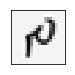

this should be [5]


In [5]:
one_sample = np.random.randint(0, 5000)
plot_an_image(X[one_sample, :])
plt.show()
print('this should be {}'.format(y[one_sample]))

In [6]:
def displayData(X, example_width = None):
    #DISPLAYDATA Display 2D data in a nice grid
    #   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
    #   stored in X in a nice grid. It returns the figure handle h and the 
    #   displayed array if requested.

    # Set example_width automatically if not passed in
    if example_width is None:
        example_width = int(np.round(np.sqrt(X.shape[1])))

    m, n = X.shape
    example_height = int(n / example_width);
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    """ sample 100 image and show them
    assume the image is square

    X : (5000, 400)
    """

    # sample 100 image, reshape, reorg it
    #sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 100*400
    #sample_images = X[sample_idx, :]
    sample_images = X

    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))

    for r in range(display_rows):
        for c in range(display_cols):
         
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((example_width, example_height)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))  
            #绘图函数，画100张图片

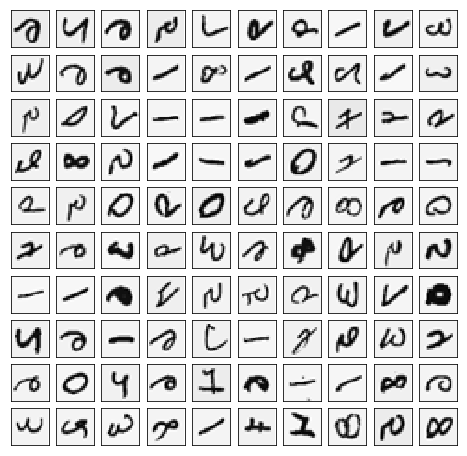

In [7]:
# Randomly select 100 data points to display
#rand_indices = randperm(m);
rand_indices = np.random.permutation(range(m));
sel = X[rand_indices[:100], :]

displayData(sel);

# 向量化逻辑回归

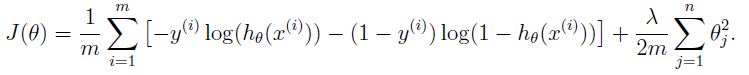
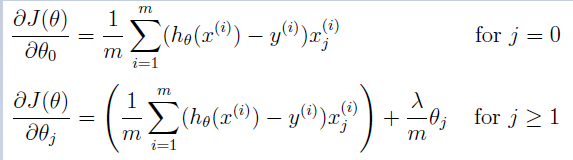

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
def lrCostFunction(theta, X, y, plambda):
    #LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
    #regularization
    #   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
    #   theta as the parameter for regularized logistic regression and the
    #   gradient of the cost w.r.t. to the parameters. 

    # Initialize some useful values

    m = len(y); # number of training examples
    theta = theta.reshape(-1,1)#for usage of fmin_cg, input value theta must be a 1-D array, here convert it to column vector
    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #
    # Hint: The computation of the cost function and gradients can be
    #       efficiently vectorized. For example, consider the computation
    #
    #           sigmoid(X * theta)
    #
    #       Each row of the resulting matrix will contain the value of the
    #       prediction for that example. You can make use of this to vectorize
    #       the cost function and gradient computations. 
    #
    
    h = sigmoid(X.dot(theta))
    #print("shape of theta")
    #print(theta.shape)
    theta_1 = theta[1:]
    J = -(y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h))) / m + 0.5*plambda*(theta_1.T.dot(theta_1))/m
    #J = -np.sum(y*(np.log(h)) + (1-y)*(np.log(1-h))) / m + 0.5*plambda*np.sum(theta_1*theta_1)/m 
    #J[1:] += 0.5*plambda*(theta_1.T.dot(theta_1))/m

    return J    

实际上作业的instruction里提示用elementwise乘法累加计算，但是实际可以写成矩阵乘法

In [15]:
def lrGradient(theta, X, y, plambda):
    # Hint: When computing the gradient of the regularized cost function, 
    #       there're many possible vectorized solutions, but one solution
    #       looks like:
    #           grad = (unregularized gradient for logistic regression)
    #           temp = theta; 
    #           temp(1) = 0;   # because we don't add anything for j = 0  
    #           grad = grad + YOUR_CODE_HERE (using the temp variable)
    #
    
    m = len(y); # number of training examples
    theta = theta.reshape(-1,1)#for usage of fmin_cg, input value theta must be a 1-D array, here convert it to column vector

    h = sigmoid(X.dot(theta))
    theta_1 = theta[1:]
    
    grad = (X.T.dot(h-y))/m
    grad[1:] += plambda*theta_1/m
    
    return grad.ravel() #作为最优化方法的fprime参数输入，是一个一维数组!!!!!!!!!!
    #return grad.reshape(1,-1) #作为最优化方法的fprime参数输入，是一个一维数组!!!!!!!!!!

In [16]:
## ============ Part 2a: Vectorize Logistic Regression ============
#  In this part of the exercise, you will reuse your logistic regression
#  code from the last exercise. You task here is to make sure that your
#  regularized logistic regression implementation is vectorized. After
#  that, you will implement one-vs-all classification for the handwritten
#  digit dataset.
#

# Test case for lrCostFunction
print('\nTesting lrCostFunction() with regularization');

theta_t = np.array([-2, -1, 1, 2]).reshape(-1,1);
#X_t = [ones(5,1) reshape(1:15,5,3)/10]; #偏置项叠加五行三列0.1~1.5
X_1 = np.array(range(1,16)).reshape(5,3)/10
X_t = np.column_stack((np.ones((5,1)),X_1))
y_t = np.array([1,0,1,0,1]).reshape(5,1)
lambda_t = 3;
J = lrCostFunction(theta_t, X_t, y_t, lambda_t);
grad =lrGradient(theta_t, X_t, y_t, lambda_t);

print('\nCost: %f\n'%J);
print('Expected cost: 2.534819\n');
print('Gradients:\n');
print(grad);
print('Expected gradients:\n');
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Testing lrCostFunction() with regularization

Cost: 2.590001

Expected cost: 2.534819

Gradients:

[-0.1212565  -0.60310931  0.58476504  1.17263939]
Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



# One-vs-All 训练

经交叉验证新的cost, gradient算法应该没有问题，应该是对于原MATLAB代码中数据理解有偏差

In [18]:
def oneVsAll(X, y, num_labels, plambda):
    """
    X: 未设置偏置项的原始数据（在本函数中完成插入偏置项）
    """
    #ONEVSALL trains multiple logistic regression classifiers and returns all
    #the classifiers in a matrix all_theta, where the i-th row of all_theta 
    #corresponds to the classifier for label i
    #   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
    #   logistic regression classifiers and returns each of these classifiers
    #   in a matrix all_theta, where the i-th row of all_theta corresponds 
    #   to the classifier for label i

    # Some useful variables
    m = X.shape[0]
    n = X.shape[1]

    # You need to return the following variables correctly 
    all_theta = np.zeros((num_labels, n + 1));

    # Add ones to the X data matrix
    X = np.column_stack((np.ones((m,1)), X))

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should complete the following code to train num_labels
    #               logistic regression classifiers with regularization
    #               parameter lambda. 
    #
    # Hint: theta(:) will return a column vector.
    #
    # Hint: You can use y == c to obtain a vector of 1's and 0's that tell you
    #       whether the ground truth is true/false for this class.
    #
    # Note: For this assignment, we recommend using fmincg to optimize the cost
    #       function. It is okay to use a for-loop (for c = 1:num_labels) to
    #       loop over the different classes.
    #
    #       fmincg works similarly to fminunc, but is more efficient when we
    #       are dealing with large number of parameters.
    #
    # Example Code for fmincg:
    #
    #     # Set Initial theta
    #     initial_theta = zeros(n + 1, 1);
    #     
    #     # Set options for fminunc
    #     options = optimset('GradObj', 'on', 'MaxIter', 50);
    # 
    #     # Run fmincg to obtain the optimal theta
    #     # This function will return theta and the cost 
    #     [theta] = ...
    #         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
    #                 initial_theta, options);
    #

    
    for i in range(num_labels):
        print("the %dth class:"%i)
        #clabel = i if i else num_labels # if i==0, set clabel to 10
        initial_theta = np.zeros((n + 1, 1))
        #index_c = np.where(y==clabel)
        c = num_labels if i==0 else i 
        #c=i
        print("label equals %d: %d"%(c,len(y[y==c])))
        y_i = np.array([1 if label == c else 0 for label in y])
        y_i = np.reshape(y_i, (m, 1))
        #X_c = X[index_c[0]]#not elegant
        theta = optimize.fmin_cg(lrCostFunction, initial_theta.ravel(), fprime = lrGradient, args = (X, y_i , plambda))
        #fmin = optimize.minimize(fun=lrCostFunction, x0=initial_theta, args=(X, y_i, plambda), method='TNC', jac=lrGradient)
        all_theta[i,:] = theta
        #all_theta[i,:] = fmin.x
        
        #print("theta:")
        #print(theta)
    
    print(all_theta)
    return all_theta
    # =========================================================================

In [19]:
data = np.loadtxt(r'..\ex2\ex2data2.txt',delimiter = ',');
X = data[:, :2]; y = data[:, 2:]

In [20]:
#使用二分类进行测试
plambda = 0.1;
all_theta = oneVsAll(X, y, 2, plambda);

the 0th class:
label equals 2: 0
Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 11
         Function evaluations: 63
         Gradient evaluations: 63
the 1th class:
label equals 1: 58
Optimization terminated successfully.
         Current function value: 0.690280
         Iterations: 7
         Function evaluations: 18
         Gradient evaluations: 18
[[ -1.30895125e+01  -1.09123628e-04  -1.15122666e-03]
 [ -1.45547978e-02  -2.99227252e-01  -1.73523014e-02]]


In [21]:
all_theta

array([[ -1.30895125e+01,  -1.09123628e-04,  -1.15122666e-03],
       [ -1.45547978e-02,  -2.99227252e-01,  -1.73523014e-02]])

In [22]:
data = scio.loadmat('ex3data1.mat'); # training data stored in arrays X, y
X = data['X']; y = data['y']

In [23]:
# ============ Part 2b: One-vs-All Training ============
print('\nTraining One-vs-All Logistic Regression...\n')

plambda = 0.1;
all_theta = oneVsAll(X, y, num_labels, plambda);


Training One-vs-All Logistic Regression...

the 0th class:
label equals 10: 500
Optimization terminated successfully.
         Current function value: 0.008581
         Iterations: 99
         Function evaluations: 384
         Gradient evaluations: 384
the 1th class:
label equals 1: 500
Optimization terminated successfully.
         Current function value: 0.013117
         Iterations: 118
         Function evaluations: 460
         Gradient evaluations: 460
the 2th class:
label equals 2: 500
Optimization terminated successfully.
         Current function value: 0.050811
         Iterations: 261
         Function evaluations: 786
         Gradient evaluations: 786
the 3th class:
label equals 3: 500
Optimization terminated successfully.
         Current function value: 0.057607
         Iterations: 211
         Function evaluations: 630
         Gradient evaluations: 630
the 4th class:
label equals 4: 500
Optimization terminated successfully.
         Current function value: 0.033067


In [24]:
all_theta.shape

(10, 401)

# 预测One vs All

In [27]:
def predictOneVsAll(all_theta, X):
    #PREDICT Predict the label for a trained one-vs-all classifier. The labels 
    #are in the range 1..K, where K = size(all_theta, 1). 
    #  p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions
    #  for each example in the matrix X. Note that X contains the examples in
    #  rows. all_theta is a matrix where the i-th row is a trained logistic
    #  regression theta vector for the i-th class. You should set p to a vector
    #  of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2
    #  for 4 examples) 

    m = len(X);
    num_labels = len(all_theta);

    # You need to return the following variables correctly 
    p = np.zeros((m, 1))
    print("shape of p: %s")
    print(p.shape)

    # Add ones to the X data matrix
    #X = [ones(m, 1) X];
    X = np.column_stack((np.ones((m,1)),X))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned logistic regression parameters (one-vs-all).
    #               You should set p to a vector of predictions (from 1 to
    #               num_labels).
    #
    # Hint: This code can be done all vectorized using the max function.
    #       In particular, the max function can also return the index of the 
    #       max element, for more information see 'help max'. If your examples 
    #       are in rows, then, you can use max(A, [], 2) to obtain the max 
    #       for each row.
    #       
    
    #p_c = np.zeros((m, num_labels))
    p_c = np.zeros((num_labels, m, 1))
    
    
    '''    for i in range(num_labels):
        clabel = i if i else num_labels
        p_c[i] = math.sigmoid(X.dot(all_theta[i].reshape(-1,1)))
    print (p_c)
    p =  np.argmax(p_c, axis = 0)'''
    h = sigmoid(all_theta.dot(X.T))
    print(h)
    p = np.argmax(h,axis=0)
    p[p==0] = num_labels
    return p
    # =========================================================================

为什么用np.mean(np.double(pred == y)) * 100)计算准确率，使用循环的情况下准确率90.34%，使用向量方法准确率只有10%？

In [28]:
data = scio.loadmat('ex3data1.mat'); # training data stored in arrays X, y
X = data['X']; y = data['y']

In [29]:
# ================ Part 3: Predict for One-Vs-All ================

pred = predictOneVsAll(all_theta, X);

#print('\nTraining Set Accuracy: %f\n'%(np.mean(np.double(pred == y)) * 100));
compare = np.column_stack((pred,y))
print('\nTraining Set Accuracy: %f\n'%( np.mean(np.double(compare[:,0]==compare[:,1]))* 100));

shape of p: %s
(5000, 1)
[[  9.99754190e-01   9.99984896e-01   9.99984034e-01 ...,   5.91623708e-11
    9.11725719e-09   4.50156373e-03]
 [  5.97039269e-17   1.43180341e-13   3.31610742e-16 ...,   6.91288324e-03
    1.26786196e-12   6.28235047e-19]
 [  8.02919205e-05   1.48298305e-06   3.48381038e-04 ...,   9.39759741e-04
    2.82029686e-10   2.07651285e-07]
 ..., 
 [  3.28454566e-09   1.43789259e-08   4.77972941e-08 ...,   8.73864642e-06
    2.54653417e-04   2.41273835e-01]
 [  5.94921341e-03   3.73487083e-03   1.57692124e-03 ...,   4.99716979e-02
    2.60413244e-03   7.07620000e-03]
 [  1.54586241e-03   1.19564892e-05   5.23426672e-04 ...,   8.83526389e-01
    8.60572820e-01   2.10017060e-01]]

Training Set Accuracy: 90.340000



fmin_cg算法 Training Set Accuracy: 90.340000
minimize算法 Training Set Accuracy: 96.460000